In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

def add_path(custom_path):
    if custom_path not in sys.path: sys.path.insert(0, custom_path)

this_dir = os.getcwd()
# [1] Path to modules to resolve import issue
lib_path = os.path.join(this_dir, 'planning_scenario', 'geometric')
add_path(lib_path)

In [2]:
from planning_scenario.geometric.narrow_world import narrow_world
from planning_scenario.geometric.random_world import random_world

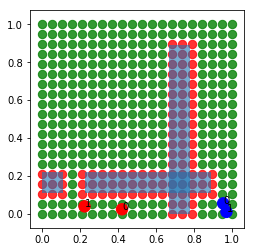

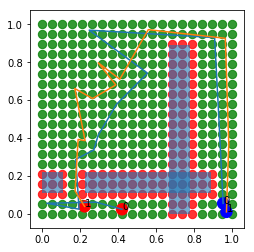

(array([0.42029508, 0.02347084, 0.22231088, 0.03893124]), array([0.42029508, 0.02347084, 0.22231088, 0.03893124, 0.95438325,
       0.05488661, 0.97194531, 0.00961665, 0.11111111, 0.11111111,
       0.22222222, 0.22222222, 0.88888889, 0.11111111, 1.        ,
       0.22222222, 0.66666667, 0.88888889, 0.77777778, 1.        ]))


In [3]:
# side note: this problem is prohibitly expensive with A* (i.e. practically insolveable) without trick
# Change "bidirectional_rrt" to "astar" to give it a try if you want :-D
test_world = narrow_world(2)
test_world.plot()
soln = test_world.solve("bidirectional_rrt")
test_world.plot(soln = soln)
data = test_world.get_trainable_data()
print(data[0])

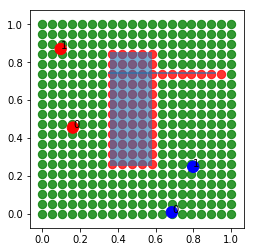

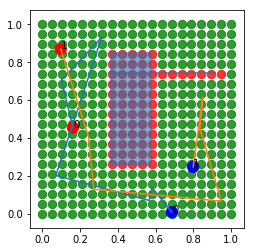

(array([0.16228476, 0.45432606, 0.09775774, 0.87037618]), array([0.16228476, 0.45432606, 0.09775774, 0.87037618, 0.68577758,
       0.00671897, 0.79850571, 0.2471564 , 0.349     , 0.74      ,
       0.9184958 , 0.75020472, 0.357     , 0.251     , 0.58188826,
       0.85315747]))


In [4]:
test_world = random_world(2, 15, "rectangle")
test_world.plot()
astar_soln = test_world.solve("bidirectional_rrt")
test_world.plot(soln = astar_soln)
data = test_world.get_trainable_data()
print(data[0])